# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# Read file into DataFrame

In [3]:
book = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/8.Association Rules/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# data understanding

In [10]:
print("Number of rows: ", len(book))
print("Number of columns: ",len(book.columns))
print("Number of rows and columns: ",book.shape)
print("Number of elements: ",book.size)
# print("Number of rows, columns, etc: ", book.info())
# print ("Data type:\n",book.dtypes)
# print ("Identify outliers & other info like Mean,median,max,min etc:\n\n",book.describe())

Number of rows:  2000
Number of columns:  11
Number of rows and columns:  (2000, 11)
Number of elements:  22000


In [20]:
book = pd.DataFrame(data=book)
for c in book.columns:
    print ("----",c," ---")
    print (book[c].value_counts())

---- ChildBks  ---
0    1154
1     846
Name: ChildBks, dtype: int64
---- YouthBks  ---
0    1505
1     495
Name: YouthBks, dtype: int64
---- CookBks  ---
0    1138
1     862
Name: CookBks, dtype: int64
---- DoItYBks  ---
0    1436
1     564
Name: DoItYBks, dtype: int64
---- RefBks  ---
0    1571
1     429
Name: RefBks, dtype: int64
---- ArtBks  ---
0    1518
1     482
Name: ArtBks, dtype: int64
---- GeogBks  ---
0    1448
1     552
Name: GeogBks, dtype: int64
---- ItalCook  ---
0    1773
1     227
Name: ItalCook, dtype: int64
---- ItalAtlas  ---
0    1926
1      74
Name: ItalAtlas, dtype: int64
---- ItalArt  ---
0    1903
1      97
Name: ItalArt, dtype: int64
---- Florence  ---
0    1783
1     217
Name: Florence, dtype: int64


In [35]:
# Frequency of books is:
book.sum(axis=0) 

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

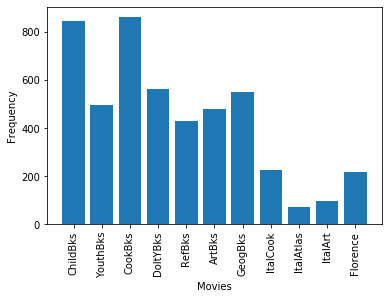

In [83]:
# Visualize movie frequency
plt.bar (book.columns ,book.sum(axis=0))
plt.xticks(rotation = 90)
plt.xlabel("Movies")
plt.ylabel("Frequency")
plt.show()

# Model Processing

In [87]:
# Perform Association rule mining

Book_Sales = apriori(book, min_support=0.005, max_len=2,use_colnames = True)
print("Raw Data:\n",Book_Sales.head())

# Sort decending order based on support  
Book_Sales.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",Book_Sales.head())

Raw Data:
    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)

Sorted as per Support value:
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (CookBks, ChildBks)


In [88]:
rules = association_rules(Book_Sales, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
102,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
68,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
69,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
87,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
...,...,...,...,...,...,...,...,...,...
59,(ChildBks),(Florence),0.4230,0.1085,0.0485,0.114657,1.056748,0.002605,1.006955
74,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
75,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
60,(CookBks),(Florence),0.4310,0.1085,0.0475,0.110209,1.015749,0.000737,1.001920


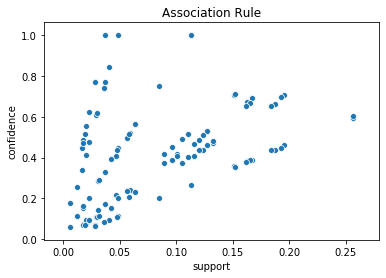

In [89]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule")
plt.show()

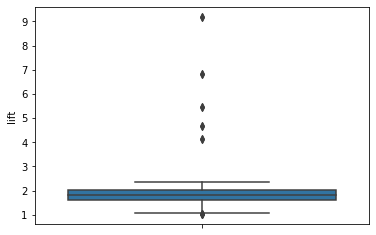

In [90]:
# Box plot to visuzlize lift
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

# ii. with different values of support, confidence & length in Apriori

In [91]:
# Perform Association rule mining

Book_Sales1 = apriori(book, min_support=0.003, max_len=4,use_colnames = True)
print("Raw Data:\n",Book_Sales1.head())

# Sort decending order based on support  
Book_Sales1.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",Book_Sales1.head())

Raw Data:
    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)

Sorted as per Support value:
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (CookBks, ChildBks)


In [94]:
rules1 = association_rules(Book_Sales1, metric="lift", min_threshold=2)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1730,"(RefBks, ItalArt)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
1735,"(ArtBks, ItalAtlas)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
4174,"(RefBks, ItalArt)","(Florence, ItalAtlas)",0.0200,0.0065,0.0040,0.200000,30.769231,0.003870,1.241875
4171,"(Florence, ItalAtlas)","(RefBks, ItalArt)",0.0065,0.0200,0.0040,0.615385,30.769231,0.003870,2.548000
2694,"(RefBks, ItalArt)","(ItalAtlas, GeogBks)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706
...,...,...,...,...,...,...,...,...,...
3886,"(RefBks, Florence, ItalAtlas)",(ChildBks),0.0065,0.4230,0.0055,0.846154,2.000364,0.002750,3.750500
346,"(ArtBks, GeogBks, YouthBks)",(ChildBks),0.0650,0.4230,0.0550,0.846154,2.000364,0.027505,3.750500
3956,(ChildBks),"(Florence, ItalAtlas)",0.4230,0.0065,0.0055,0.013002,2.000364,0.002750,1.006588
355,(ChildBks),"(ArtBks, GeogBks, YouthBks)",0.4230,0.0650,0.0550,0.130024,2.000364,0.027505,1.074742


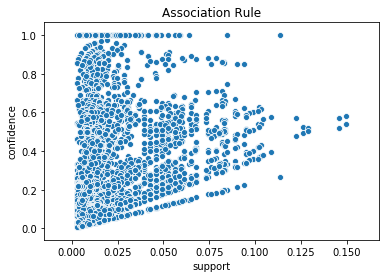

In [95]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule")
plt.show()

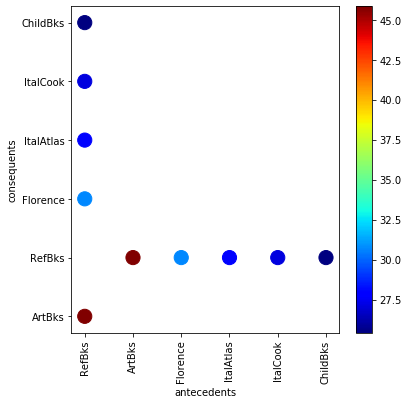

In [96]:
A1 = rules1.antecedents.iloc[0:10]
B1 = rules1.consequents.iloc[0:10]
C1 = rules1.lift.iloc[0:10]

# abovecode give frozen set error so change A & B:

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()